In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()

sl_no              2
gender             2
ssc_p              2
ssc_b              2
hsc_p              2
hsc_b              2
hsc_s              2
degree_p           2
degree_t           2
workex             2
etest_p            2
specialisation     2
mba_p              2
status             2
salary            69
dtype: int64

### Question 1

In [5]:
# Handling numerical columns
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
dataset[numerical_columns] = dataset[numerical_columns].fillna(dataset[numerical_columns].median())

"""Median for numerical data: It is less affected by extreme values (outliers) and provides a robust central tendency."""

'Median for numerical data: It is less affected by extreme values (outliers) and provides a robust central tendency.'

In [6]:
# Handling categorical columns
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
for col in categorical_columns:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])  # Extracting the first mode value

"""Mode for categorical data: It ensures consistency by assigning the most common value."""    

'Mode for categorical data: It ensures consistency by assigning the most common value.'

In [7]:
# Handling 'salary' column separately
dataset['salary'] = pd.to_numeric(dataset['salary'], errors='coerce')  # Ensure it's numeric
dataset['salary'] = dataset['salary'].fillna(0)  # Fill missing values

"""0 for salary: Missing salary values likely indicate no job offer or undisclosed salary, so replacing them with 0 makes sense."""

'0 for salary: Missing salary values likely indicate no job offer or undisclosed salary, so replacing them with 0 makes sense.'

In [8]:
dataset['sl_no'] = dataset['sl_no'].ffill()  # Forward fill missing serial numbers

In [9]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## Question 2

In [10]:
not_placed_count = dataset[dataset['status'] == 'Not Placed'].shape[0]
print("Number of students not placed:", not_placed_count)

Number of students not placed: 67


## Question 3

In [11]:
"""
1. Academic Performance:
Low percentages in ssc_p, hsc_p, degree_p, etest_p, mba_p
Check if students with lower marks have a higher non-placement rate

2. Degree Type & Specialization:
Certain degree types (degree_t) or specializations (specialisation) might have lower placement rates.

3. Work Experience:
Students with no work experience (workex = 'No') might be less likely to be placed.
"""

# Comparing placement status with academic scores
print("Average scores of placed vs not placed students:")
print(dataset.groupby('status')[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].mean())

# Count of placed vs not placed based on degree type and specialization
print("\nPlacement status by degree type:")
print(dataset.groupby(['degree_t', 'status']).size())

print("\nPlacement status by specialization:")
print(dataset.groupby(['specialisation', 'status']).size())

# Work experience impact
print("\nWork experience vs placement:")
print(dataset.groupby(['workex', 'status']).size())

Average scores of placed vs not placed students:
                ssc_p      hsc_p   degree_p   etest_p      mba_p
status                                                          
Not Placed  57.544030  58.395522  61.134179  69.58791  61.612836
Placed      71.658533  69.860867  68.704000  73.20820  62.571667

Placement status by degree type:
degree_t   status    
Comm&Mgmt  Not Placed     43
           Placed        104
Others     Not Placed      6
           Placed          5
Sci&Tech   Not Placed     18
           Placed         41
dtype: int64

Placement status by specialization:
specialisation  status    
Mkt&Fin         Not Placed    25
                Placed        97
Mkt&HR          Not Placed    42
                Placed        53
dtype: int64

Work experience vs placement:
workex  status    
No      Not Placed    57
        Placed        86
Yes     Not Placed    10
        Placed        64
dtype: int64


## Question 4

In [12]:
"""
This will show how strongly mba_p and salary are related.
A positive value means higher mba_p leads to a higher salary.
A negative value means higher mba_p leads to a lower salary.
A value close to 0 means no significant relationship.
"""
correlation = dataset[['mba_p', 'salary']].corr()
print("Correlation between MBA percentage and Salary:")
print(correlation)

Correlation between MBA percentage and Salary:
           mba_p    salary
mba_p   1.000000  0.139329
salary  0.139329  1.000000


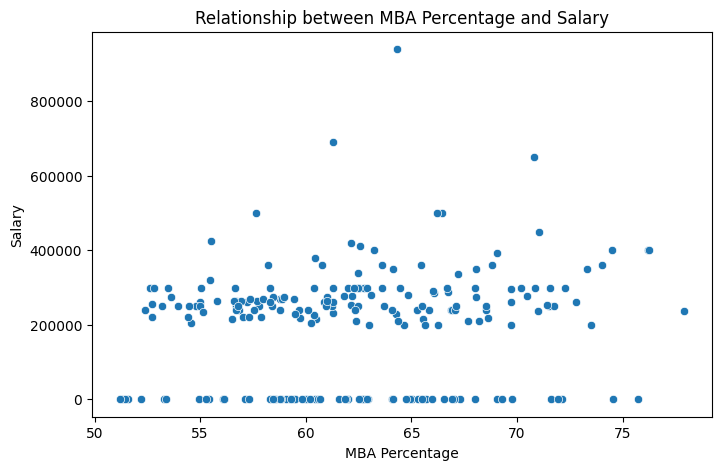

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship
plt.figure(figsize=(8,5))
sns.scatterplot(x=dataset['mba_p'], y=dataset['salary'])
plt.xlabel("MBA Percentage")
plt.ylabel("Salary")
plt.title("Relationship between MBA Percentage and Salary")
plt.show()

#This scatter plot helps visualize trends between mba_p and salary.
#If the points form an upward trend, a higher MBA percentage leads to higher salaries.

#Possible Findings:

#If correlation is positive, higher MBA percentages may lead to better salaries.
#If correlation is near zero, MBA scores might not significantly impact salaries.
#If correlation is negative, a higher MBA percentage might be linked to lower salaries (unlikely).

## Question 5

In [14]:
min_salary_specialization = dataset.groupby("specialisation")["salary"].min()
print("Minimum salary for each specialization:\n", min_salary_specialization)

# Find specialization with overall minimum salary
specialization_with_min_salary = min_salary_specialization.idxmin()
print("\nSpecialization with the lowest salary:", specialization_with_min_salary)

Minimum salary for each specialization:
 specialisation
Mkt&Fin    0.0
Mkt&HR     0.0
Name: salary, dtype: float64

Specialization with the lowest salary: Mkt&Fin


## Question 6

In [15]:
high_salary_count = dataset[dataset['salary'] > 500000].shape[0]
print("Number of students getting salary above 500,000:", high_salary_count)

Number of students getting salary above 500,000: 3


## Question 7

In [16]:
"""
Null Hypothesis (H₀): There is no significant difference between the means of etest_p and mba_p.
Alternative Hypothesis (H₁): There is a significant difference between the means of etest_p and mba_p.
"""

from scipy import stats

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(dataset['etest_p'], dataset['mba_p'])

# Print results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Decision at 5% significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: There is a significant difference between etest_p and mba_p.")
else:
    print("Fail to Reject the Null Hypothesis: No significant difference between etest_p and mba_p.")

#If p-value < 0.05, we reject H₀ → etest_p and mba_p are significantly different.
#If p-value ≥ 0.05, we fail to reject H₀ → etest_p and mba_p are not significantly different.

F-statistic: 100.33226296639641
P-value: 2.2444909488516516e-21
Reject the Null Hypothesis: There is a significant difference between etest_p and mba_p.


## Question 8

In [17]:
"""
Null Hypothesis (H₀): There is no significant difference in salary between degree_t = Sci&Tech and specialisation = Mkt&HR.
Alternative Hypothesis (H₁): There is a significant difference in salary between degree_t = Sci&Tech and specialisation = Mkt&HR.
"""

from scipy import stats

# Filter salaries for each category
salary_sci_tech = dataset[dataset['degree_t'] == 'Sci&Tech']['salary'].dropna()
salary_mkt_hr = dataset[dataset['specialisation'] == 'Mkt&HR']['salary'].dropna()

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(salary_sci_tech, salary_mkt_hr, equal_var=False)

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Decision at 5% significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: There is a significant difference in salaries between Sci&Tech and Mkt&HR.")
else:
    print("Fail to Reject the Null Hypothesis: No significant difference in salaries between Sci&Tech and Mkt&HR.")

#If p-value < 0.05, we reject H₀ → There is a significant difference in salaries between Sci&Tech graduates and Mkt&HR specialization.
#If p-value ≥ 0.05, we fail to reject H₀ → There is no significant difference in salaries between the two groups.

T-statistic: 2.584058295797713
P-value: 0.011110477852831745
Reject the Null Hypothesis: There is a significant difference in salaries between Sci&Tech and Mkt&HR.


## Question 9

In [18]:
# Standardization (Z-score normalization)
dataset['salary_standardized'] = (dataset['salary'] - dataset['salary'].mean()) / dataset['salary'].std()

# Display the first few rows
print(dataset[['salary', 'salary_standardized']].head())

     salary  salary_standardized
0  270000.0             0.471090
1  200000.0             0.020157
2  250000.0             0.342252
3       0.0            -1.268223
4  425000.0             1.469584


## Question 10

In [19]:
import numpy as np
from scipy.stats import norm

# Get mean and standard deviation of salary
mu = dataset['salary'].mean()
sigma = dataset['salary'].std()

# Define salary range
salary_range = np.arange(700000, 900001, 10000)  # Range from 700000 to 900000 with step of 10,000

# Compute PDF values for each salary in range
pdf_values = norm.pdf(salary_range, mu, sigma)

# Print the results
for s, p in zip(salary_range, pdf_values):
    print(f"Salary: {s}, PDF: {p}")

Salary: 700000, PDF: 1.3453733942637965e-08
Salary: 710000, PDF: 1.0895970760140604e-08
Salary: 720000, PDF: 8.787933989688095e-09
Salary: 730000, PDF: 7.058386015888424e-09
Salary: 740000, PDF: 5.64575188611221e-09
Salary: 750000, PDF: 4.497135089654428e-09
Salary: 760000, PDF: 3.5673674193235287e-09
Salary: 770000, PDF: 2.818107218713029e-09
Salary: 780000, PDF: 2.2169961860924504e-09
Salary: 790000, PDF: 1.7368813118459178e-09
Salary: 800000, PDF: 1.3551054797817856e-09
Salary: 810000, PDF: 1.052867750516509e-09
Salary: 820000, PDF: 8.146523376622187e-10
Salary: 830000, PDF: 6.27723742735e-10
Salary: 840000, PDF: 4.816843827088529e-10
Salary: 850000, PDF: 3.680902709827367e-10
Salary: 860000, PDF: 2.8011984315200587e-10
Salary: 870000, PDF: 2.122907997027964e-10
Salary: 880000, PDF: 1.6021981810509477e-10
Salary: 890000, PDF: 1.2042012077307762e-10
Salary: 900000, PDF: 9.013213225672426e-11


## Question 11

In [20]:
#Null Hypothesis (H₀): There is no significant difference in etest_p (or mba_p) scores between Sci&Tech students and others.
#Alternative Hypothesis (H₁): There is a significant difference in etest_p (or mba_p) scores between Sci&Tech students and others.

from scipy import stats

# Filter data for Sci&Tech and others
sci_tech_etest = dataset[dataset['degree_t'] == 'Sci&Tech']['etest_p'].dropna()
others_etest = dataset[dataset['degree_t'] != 'Sci&Tech']['etest_p'].dropna()

sci_tech_mba = dataset[dataset['degree_t'] == 'Sci&Tech']['mba_p'].dropna()
others_mba = dataset[dataset['degree_t'] != 'Sci&Tech']['mba_p'].dropna()

# Perform t-test for etest_p
t_stat_etest, p_value_etest = stats.ttest_ind(sci_tech_etest, others_etest, equal_var=False)

# Perform t-test for mba_p
t_stat_mba, p_value_mba = stats.ttest_ind(sci_tech_mba, others_mba, equal_var=False)

# Print results
print(f"T-test for etest_p: T-statistic = {t_stat_etest}, P-value = {p_value_etest}")
print(f"T-test for mba_p: T-statistic = {t_stat_mba}, P-value = {p_value_mba}")

# Decision at 5% significance level
alpha = 0.05

if p_value_etest < alpha:
    print("Reject H₀ for etest_p: There is a significant difference in etest_p scores for Sci&Tech students.")
else:
    print("Fail to reject H₀ for etest_p: No significant difference in etest_p scores for Sci&Tech students.")

if p_value_mba < alpha:
    print("Reject H₀ for mba_p: There is a significant difference in mba_p scores for Sci&Tech students.")
else:
    print("Fail to reject H₀ for mba_p: No significant difference in mba_p scores for Sci&Tech students.")

#If p-value < 0.05, we reject H₀ → There is a significant difference.
#If p-value ≥ 0.05, we fail to reject H₀ → There is no significant difference.

T-test for etest_p: T-statistic = 0.14584346264785156, P-value = 0.8843410084190914
T-test for mba_p: T-statistic = 1.820024413547257, P-value = 0.0717164084043401
Fail to reject H₀ for etest_p: No significant difference in etest_p scores for Sci&Tech students.
Fail to reject H₀ for mba_p: No significant difference in mba_p scores for Sci&Tech students.


## Question 12

In [21]:
# Select only numerical columns
numeric_dataset = dataset.select_dtypes(include=['number'])

# Compute correlation of salary with numerical columns
correlation_matrix = numeric_dataset.corr()

# Get correlations of salary column
salary_correlation = correlation_matrix['salary'].dropna().drop('salary', errors='ignore')  

# Sort by absolute correlation values in descending order
salary_correlation_sorted = salary_correlation.abs().sort_values(ascending=False)

# Print the most correlated parameter
print("Most correlated parameter with salary:", salary_correlation_sorted.idxmax())
print(salary_correlation_sorted)

#Interpretation
##The parameter with the highest absolute correlation will be printed.
##A positive correlation means higher values in the parameter lead to higher salaries.
##A negative correlation means higher values in the parameter lead to lower salaries.

Most correlated parameter with salary: salary_standardized
salary_standardized    1.000000
ssc_p                  0.534359
hsc_p                  0.450567
degree_p               0.405879
etest_p                0.186549
mba_p                  0.139329
sl_no                  0.021418
Name: salary, dtype: float64


## Question 13

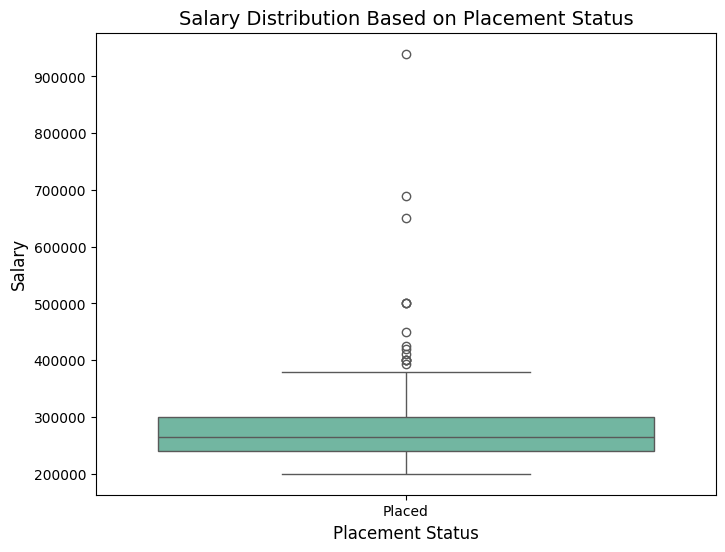

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only placed students (salary > 0)
placed_students = dataset[dataset['salary'] > 0]

# Plot boxplot for salary vs placement status with hue
plt.figure(figsize=(8, 6))
sns.boxplot(x="status", y="salary", data=placed_students, hue="status", palette="Set2", legend=False)

# Title and labels
plt.title("Salary Distribution Based on Placement Status", fontsize=14)
plt.xlabel("Placement Status", fontsize=12)
plt.ylabel("Salary", fontsize=12)

# Show plot
plt.show()

In [23]:
# Explanation of the Graph:
# Placement Impact on Salary

# Students with "Placed" status have varying salary ranges.
# Non-placed students are excluded since their salary is 0.
# Salary Spread

# The median salary (thick line inside the box) represents the middle value of placed students' salaries.
# The whiskers indicate the range of salaries, and outliers (dots) represent extreme salaries.
# Insights from the Graph

# If the spread is large, salaries vary significantly among placed students.
# If there are many outliers, some students receive exceptionally high or low salaries.